Добавляем необходимые модули, после чего загружаем датафрейм

In [1]:
import pandas as pd
import numpy as np

In [23]:
import seaborn as sns

In [2]:
df = pd.read_csv("6®9games.csv")

In [3]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 5.6 MB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Выведем названия столбцов таблицы, после чего исправим названия

In [5]:
df.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [6]:
df = df.rename(columns={
    "Name": "name",
    "Platform": "platform",
    "Year_of_Release": "year_of_release",
    "Genre": "genre",
    "NA_sales": "na_sales",
    "EU_sales": "eu_sales",
    "JP_sales": "jp_sales",
    "Other_sales": "other_sales",
    "Critic_Score": "critic_score",
    "User_Score": "user_score",
    "Rating": "rating"
})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Проверим наличие пропусков в датасете


In [8]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Исходя из полученных данных о пропусках сделаем следующее:
- В столбцах оценок (score) и года релиза вместо пропусков подставим среднее значение каждого из столбцов
- В столбце названия игр избавимся от Nan значений удалив эти строчки
- Что касается рейтинга игры, то тут достаточно неоднозначная ситуация, т.к. каким либо образом определить рейтинг игры из имеющихся параметров невозможно, из-за чего придется отказаться от данных без информации о рейтинге

В столбце user_score нашли некорректное значение "tbd". Удалим эту строчку
А также исправим тип хранящихся значений на float

In [9]:
df = df.drop(df[df.user_score == "tbd"].index)

In [10]:
df[["user_score"]] = df[["user_score"]].astype(float)

In [11]:
df["critic_score"] = df["critic_score"].fillna(df["critic_score"].mean())
df["user_score"] = df["user_score"].fillna(df["user_score"].mean())
df["year_of_release"] = df["year_of_release"].fillna(df["year_of_release"].mean())
df = df.drop(df[df.name.isnull()].index)
df = df.drop(df[df.rating.isnull()].index)

Исправим тип значений в year_of_release на int

In [12]:
df[["year_of_release"]] = df[["year_of_release"]].astype(np.int64)

In [13]:
df.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Проверим данные на наличие дубликатов и в случае, если они присутствуют - удалим и обновим индексацию

In [14]:
df.duplicated().sum()

0

Преобразуем типы столбцов

In [15]:
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [16]:
df[["name"]] = df[["name"]].astype("string")
df[["platform"]] = df[["platform"]].astype("string")
df[["genre"]] = df[["genre"]].astype("string")
df[["rating"]] = df[["rating"]].astype("string")

In [17]:
df.dtypes

name                string
platform            string
year_of_release      int64
genre               string
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              string
dtype: object

Построили точечную диаграмму (матрицу диаграмм рассеяния)

array([[<AxesSubplot: xlabel='year_of_release', ylabel='year_of_release'>,
        <AxesSubplot: xlabel='na_sales', ylabel='year_of_release'>,
        <AxesSubplot: xlabel='eu_sales', ylabel='year_of_release'>,
        <AxesSubplot: xlabel='jp_sales', ylabel='year_of_release'>,
        <AxesSubplot: xlabel='other_sales', ylabel='year_of_release'>,
        <AxesSubplot: xlabel='critic_score', ylabel='year_of_release'>,
        <AxesSubplot: xlabel='user_score', ylabel='year_of_release'>],
       [<AxesSubplot: xlabel='year_of_release', ylabel='na_sales'>,
        <AxesSubplot: xlabel='na_sales', ylabel='na_sales'>,
        <AxesSubplot: xlabel='eu_sales', ylabel='na_sales'>,
        <AxesSubplot: xlabel='jp_sales', ylabel='na_sales'>,
        <AxesSubplot: xlabel='other_sales', ylabel='na_sales'>,
        <AxesSubplot: xlabel='critic_score', ylabel='na_sales'>,
        <AxesSubplot: xlabel='user_score', ylabel='na_sales'>],
       [<AxesSubplot: xlabel='year_of_release', ylabel='eu_sale

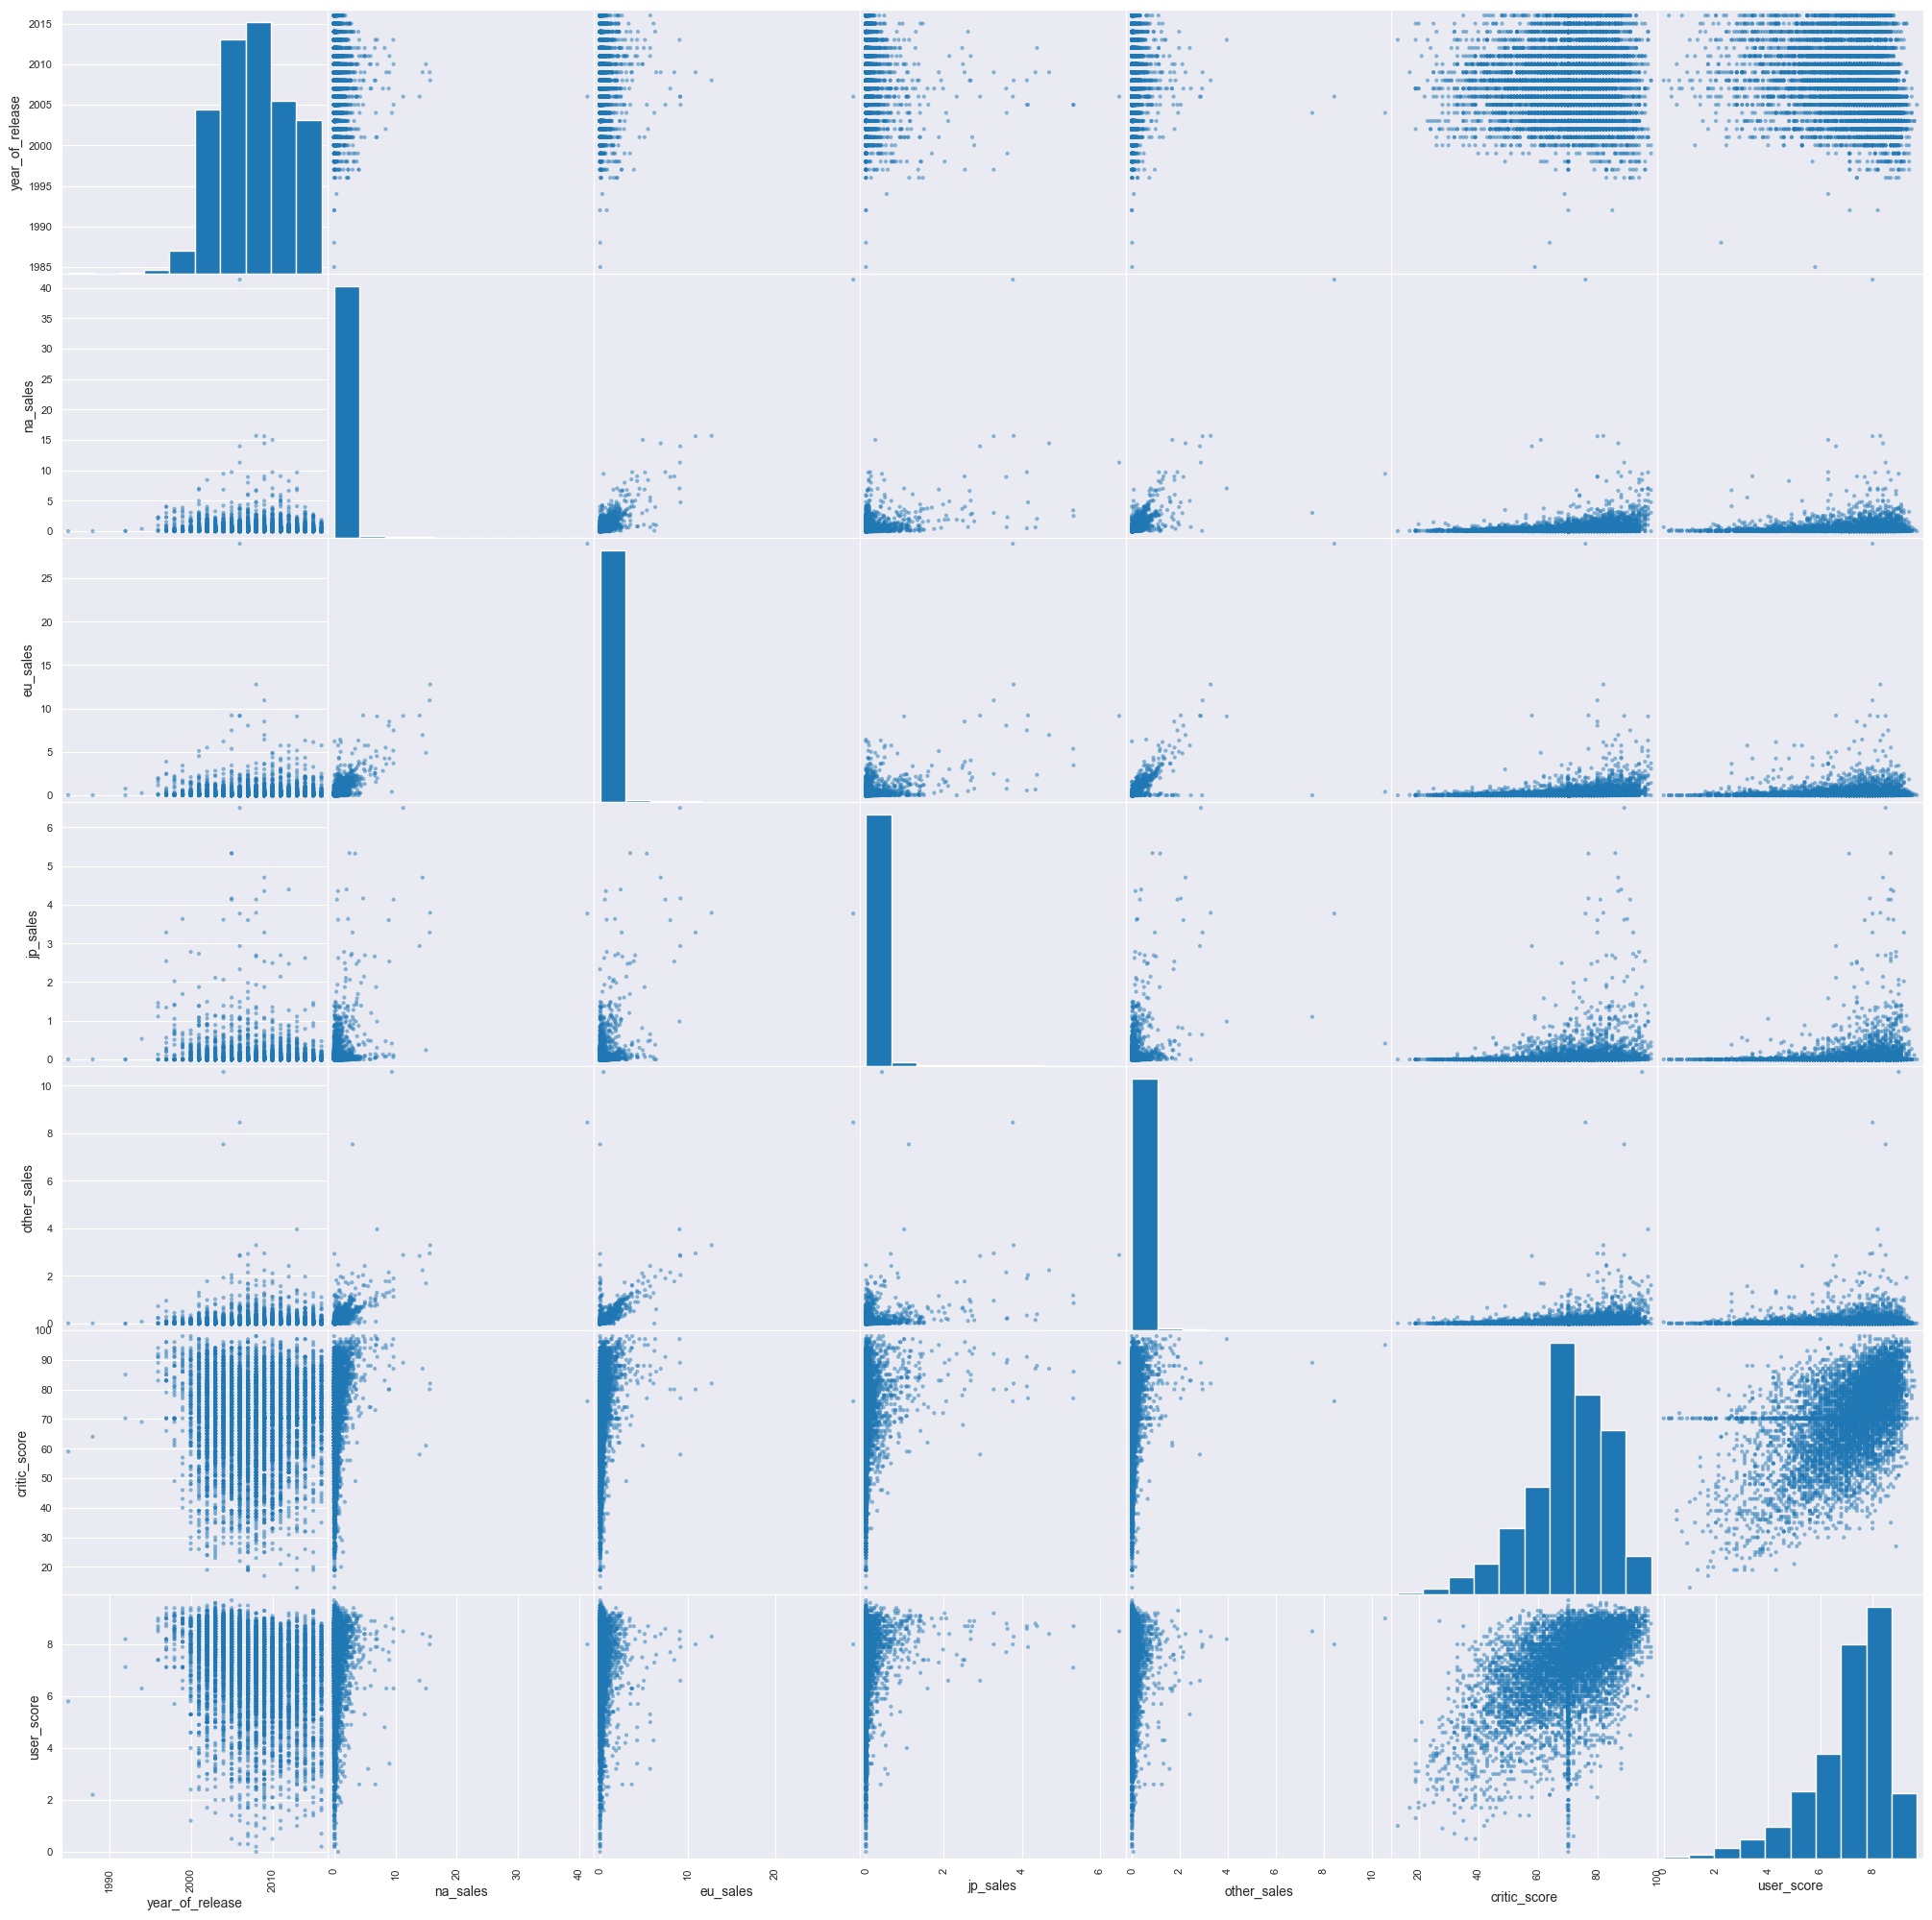

In [18]:
pd.plotting.scatter_matrix(df, figsize=(25, 25))

/Users/konstantinstepurin/opt/anaconda3/envs/main/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='eu_sales', ylabel='na_sales'>

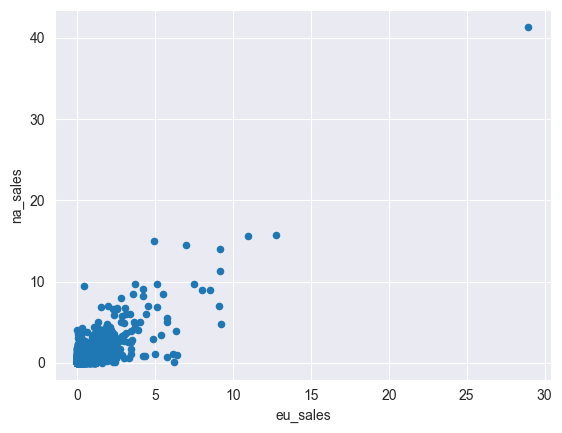

In [19]:
df.plot(y="na_sales", x="eu_sales", kind="scatter")

<AxesSubplot: xlabel='other_sales', ylabel='na_sales'>

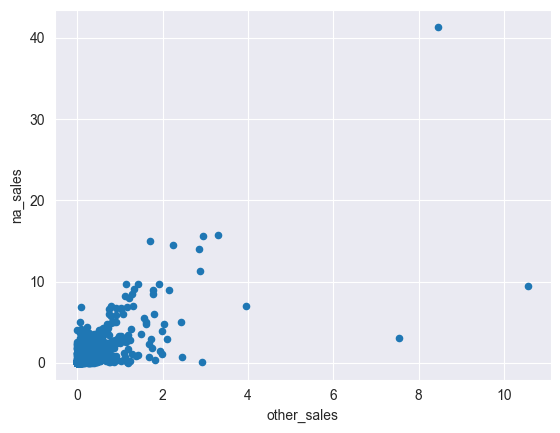

In [20]:
df.plot(y="na_sales", x="other_sales", kind="scatter")

<AxesSubplot: xlabel='rating'>

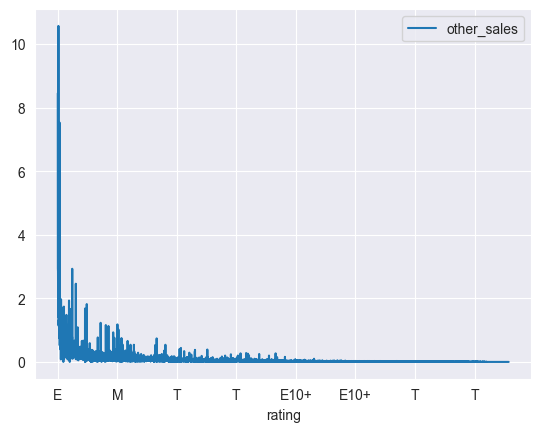

In [30]:
df.plot(y="other_sales", x="rating")

Рассчет коэффициента корреляции и ковариации

In [21]:
df.cov()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,18.060679,-0.109739,0.085822,-0.048137,0.038215,-0.421733,-1.691044
na_sales,-0.109739,0.859801,0.511278,0.118190,0.173446,2.880085,0.119006
eu_sales,0.085822,0.511278,0.434668,0.093448,0.121771,1.854926,0.054246
jp_sales,-0.048137,0.118190,0.093448,0.075197,0.027873,0.534193,0.051209
other_sales,0.038215,0.173446,0.121771,0.027873,0.066976,0.655042,0.022004
critic_score,-0.421733,2.880085,1.854926,0.534193,0.655042,177.918487,10.692396
user_score,-1.691044,0.119006,0.054246,0.051209,0.022004,10.692396,2.231137


In [22]:
df.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.027848,0.030631,-0.041306,0.034746,-0.007440,-0.266394
na_sales,-0.027848,1.000000,0.836333,0.464816,0.722777,0.232861,0.085922
eu_sales,0.030631,0.836333,1.000000,0.516882,0.713683,0.210929,0.055085
jp_sales,-0.041306,0.464816,0.516882,1.000000,0.392755,0.146045,0.125020
other_sales,0.034746,0.722777,0.713683,0.392755,1.000000,0.189757,0.056922
critic_score,-0.007440,0.232861,0.210929,0.146045,0.189757,1.000000,0.536663
user_score,-0.266394,0.085922,0.055085,0.125020,0.056922,0.536663,1.000000


Построение тепловой карты корреляции

<AxesSubplot: >

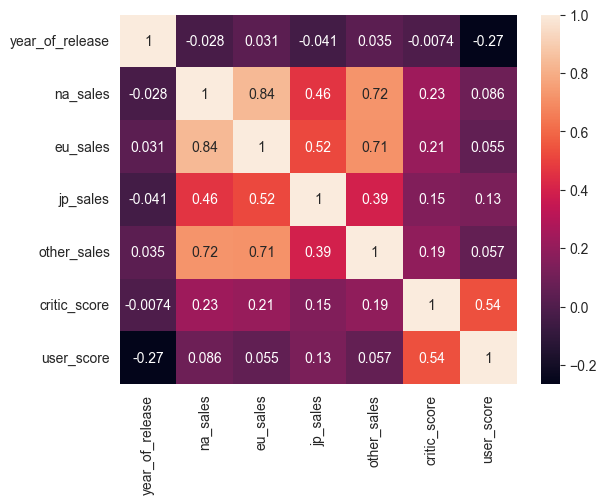

In [24]:
sns.heatmap(df.corr(), annot=True)